# Load database

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv

In [4]:
# Carregar variáveis de ambiente do arquivo .env
load_dotenv()

# Obter caminhos do arquivo csv e do diretório de extração das variáveis de ambiente
propostas_credito_path = os.getenv('PROPOSTAS_CREDITO_CSV')

In [5]:
# Carregar o CSV em um DataFrame Pandas
df_propostas_credito = pd.read_csv(propostas_credito_path)

# Verificar as primeiras linhas do DataFrame para garantir que os dados foram carregados corretamente
df_propostas_credito.head()


,cod_proposta,cod_cliente,cod_colaborador,data_entrada_proposta,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,status_proposta
0,116,338,1,2014-05-30 18:43:12 UTC,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,0,Enviada
1,715,45,1,2021-06-17 13:09:32 UTC,0.0131,12897.538285,19848.55,6951.011715,232.124685,100,1,Enviada
2,755,494,1,2021-08-10 04:24:02 UTC,0.0203,122236.312551,187154.36,64918.047449,3673.518951,56,0,Enviada
3,953,381,1,2011-02-23 07:57:58 UTC,0.0167,47784.649757,59530.61,11745.960243,955.041560,109,3,Enviada
4,1046,176,1,2010-11-15 16:03:28 UTC,0.0211,178393.038243,214294.19,35901.151757,10219.659415,22,4,Enviada


**Análise inicial do Dataframe**

In [151]:
df_propostas_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod_proposta           2000 non-null   int64  
 1   cod_cliente            2000 non-null   int64  
 2   cod_colaborador        2000 non-null   int64  
 3   data_entrada_proposta  2000 non-null   object 
 4   taxa_juros_mensal      2000 non-null   float64
 5   valor_proposta         2000 non-null   float64
 6   valor_financiamento    2000 non-null   float64
 7   valor_entrada          2000 non-null   float64
 8   valor_prestacao        2000 non-null   float64
 9   quantidade_parcelas    2000 non-null   int64  
 10  carencia               2000 non-null   int64  
 11  status_proposta        2000 non-null   object 
dtypes: float64(5), int64(5), object(2)
memory usage: 187.6+ KB


In [152]:
df_propostas_credito.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cod_proposta,2000.0,1000.500000,577.494589,1.000000,500.750000,1000.500000,1500.250000,2000.000000
cod_cliente,2000.0,505.638000,287.751477,2.000000,252.000000,508.000000,756.000000,999.000000
cod_colaborador,2000.0,51.588000,28.600162,1.000000,27.000000,52.000000,76.000000,100.000000
taxa_juros_mensal,2000.0,0.016682,0.004933,0.008000,0.012400,0.016800,0.021000,0.025000
valor_proposta,2000.0,83890.490070,51178.425752,944.006403,39398.933002,81968.179827,123508.226751,206514.635559
valor_financiamento,2000.0,124758.355855,72738.017686,1605.630000,60587.707500,126780.690000,187196.995000,249974.500000
valor_entrada,2000.0,40867.865785,28030.837804,288.504238,17486.410004,36972.764570,59148.283054,120647.797017
valor_prestacao,2000.0,4881.837965,12884.892419,19.164761,1195.505074,2328.468782,4019.692892,190122.091859
quantidade_parcelas,2000.0,61.229500,35.016681,1.000000,30.750000,61.000000,92.000000,120.000000
carencia,2000.0,3.044000,2.016953,0.000000,1.000000,3.000000,5.000000,6.000000


**Verificar dados faltantes**

In [153]:
df_propostas_credito.isna().any()

cod_proposta             False
cod_cliente              False
cod_colaborador          False
data_entrada_proposta    False
taxa_juros_mensal        False
valor_proposta           False
valor_financiamento      False
valor_entrada            False
valor_prestacao          False
quantidade_parcelas      False
carencia                 False
status_proposta          False
dtype: bool

**Taxa de Juros Mensal Média:**

In [155]:
taxa_juros_media = df_propostas_credito['taxa_juros_mensal'].mean()
print(f"Taxa de juros média: {taxa_juros_media:.2f}%")

Taxa de juros média: 0.02%


**Valor Total de Propostas por Status**


Agrupar e somar o valor total das propostas por status para entender a distribuição financeira das propostas

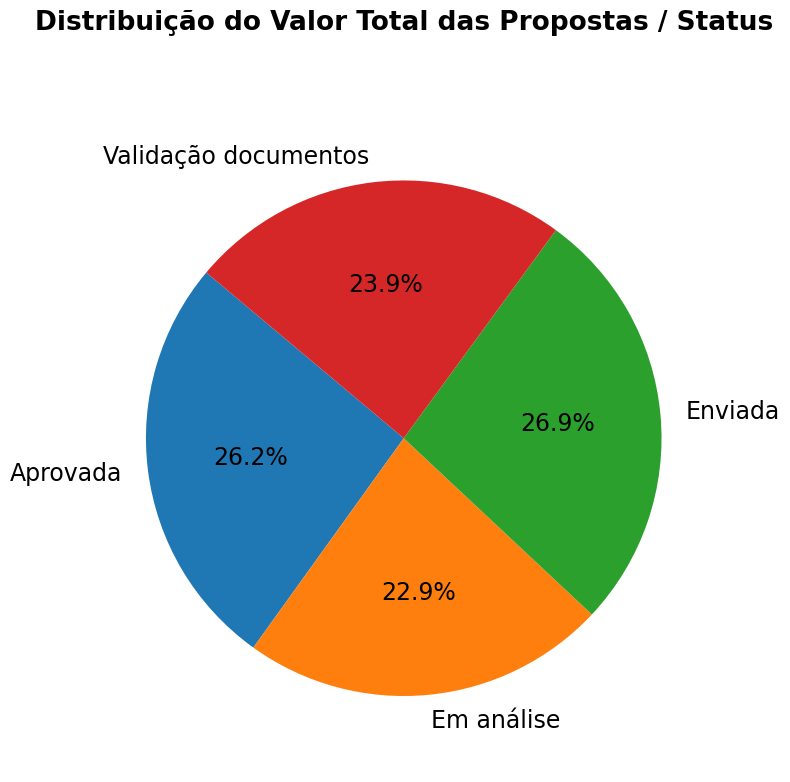

In [159]:
valor_total_por_status = df_propostas_credito.groupby('status_proposta')['valor_proposta'].sum()

# Plotar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(valor_total_por_status, labels=valor_total_por_status.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 17})
plt.title('Distribuição do Valor Total das Propostas / Status', y=1.1, fontweight='bold', fontsize=19)
plt.axis('equal')
plt.tight_layout()
plt.show()


**Quantidade de Propostas por Agência**

In [168]:
# Carregar os arquivos CSV
df_agencia = pd.read_csv('agencias.csv')
df_colaborador_agencia = pd.read_csv('colaborador_agencia.csv')
df_colaboradores = pd.read_csv('colaboradores.csv')

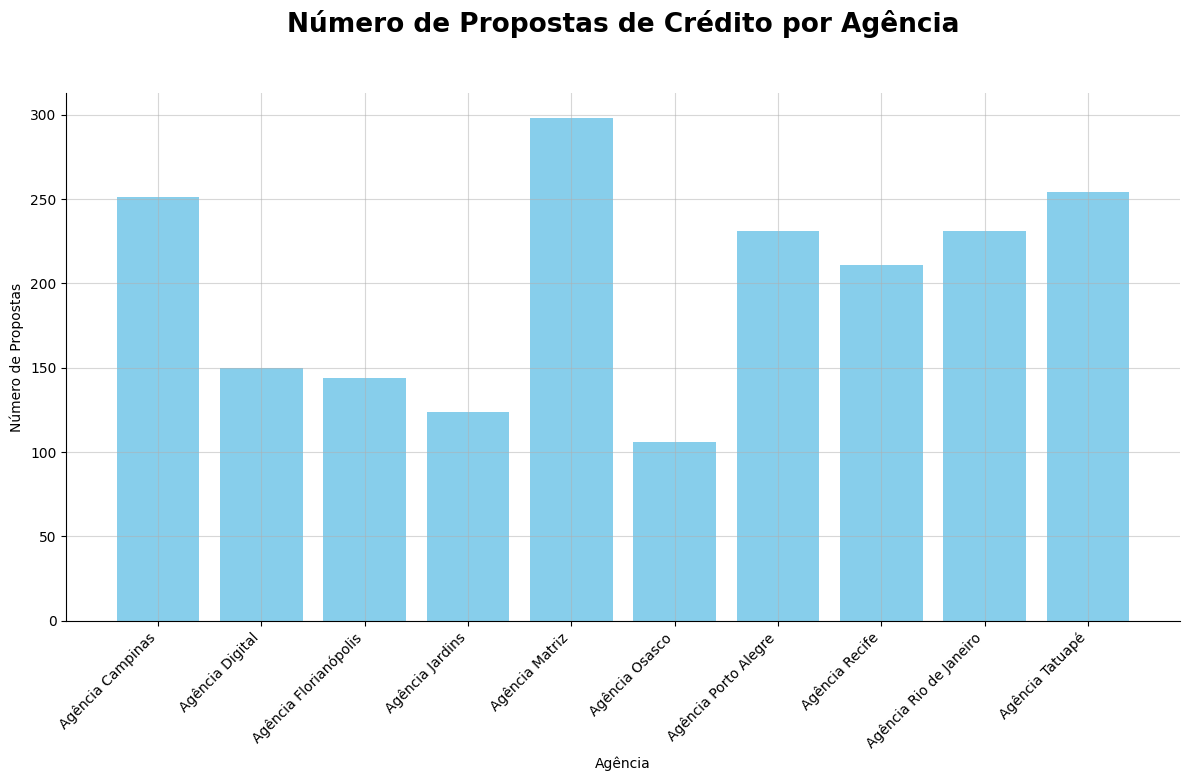

In [169]:
# Merge para obter o nome da agência
df_colaborador_agencia = df_colaborador_agencia.merge(df_agencia[['cod_agencia', 'nome']], on='cod_agencia')

# Merge para relacionar propostas de crédito com agências e nome das agências
df_propostas_agencia = df_propostas_credito.merge(df_colaborador_agencia, on='cod_colaborador').groupby('nome')['cod_proposta'].count().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_propostas_agencia['nome'], df_propostas_agencia['cod_proposta'], color='skyblue')
plt.title('Número de Propostas de Crédito por Agência', y=1.1, fontweight='bold', fontsize=19)
plt.xlabel('Agência')
plt.ylabel('Número de Propostas')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()



**Análise Temporal das Propostas**

Verificar como as propostas estão distribuídas ao longo do tempo.

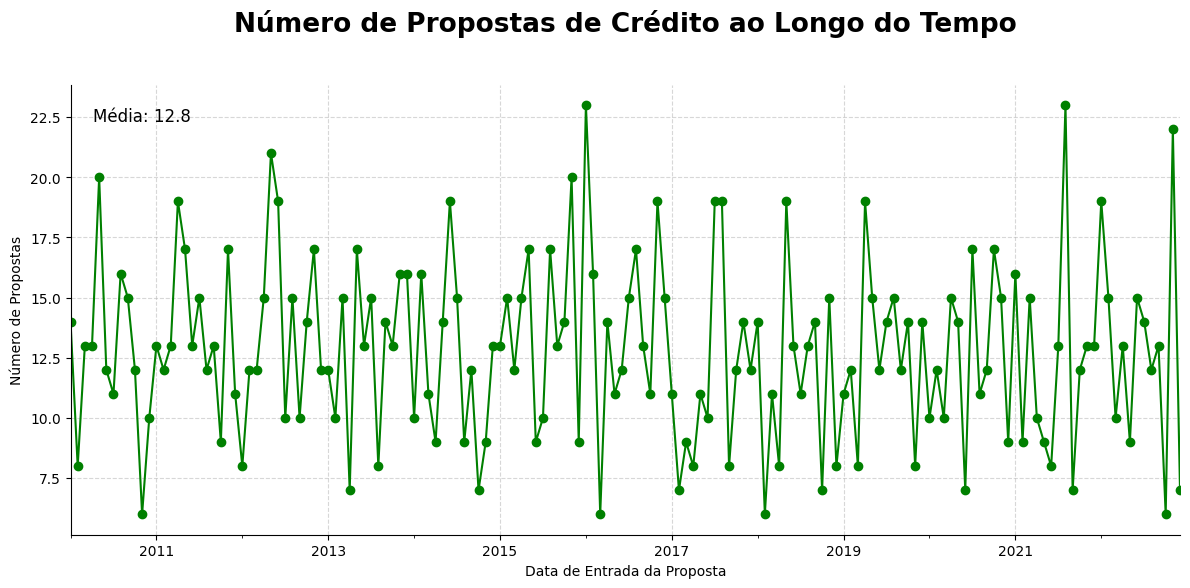

In [177]:
df_propostas_credito['data_entrada_proposta'] = pd.to_datetime(df_propostas_credito['data_entrada_proposta'])

# Agrupar por mês e contar o número de propostas
propostas_por_mes = df_propostas_credito.resample('M', on='data_entrada_proposta')['cod_proposta'].count()

# Calcular a média
media_propostas = propostas_por_mes.mean()

# Plotar gráfico de linha
plt.figure(figsize=(12, 6))
propostas_por_mes.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Número de Propostas de Crédito ao Longo do Tempo', y=1.1, fontweight='bold', fontsize=19)
plt.xlabel('Data de Entrada da Proposta')
plt.ylabel('Número de Propostas')
plt.grid(True,  linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionar a média como texto no gráfico (no topo esquerdo)
plt.text(0.02, 0.95, f'Média: {media_propostas:.1f}', fontsize=12, transform=plt.gca().transAxes, va='top')

plt.tight_layout()
plt.show()

**Análise de Valor de Financiamento vs. Valor de Entrada**

Visualizar a relação entre o valor de financiamento e o valor de entrada nas propostas.

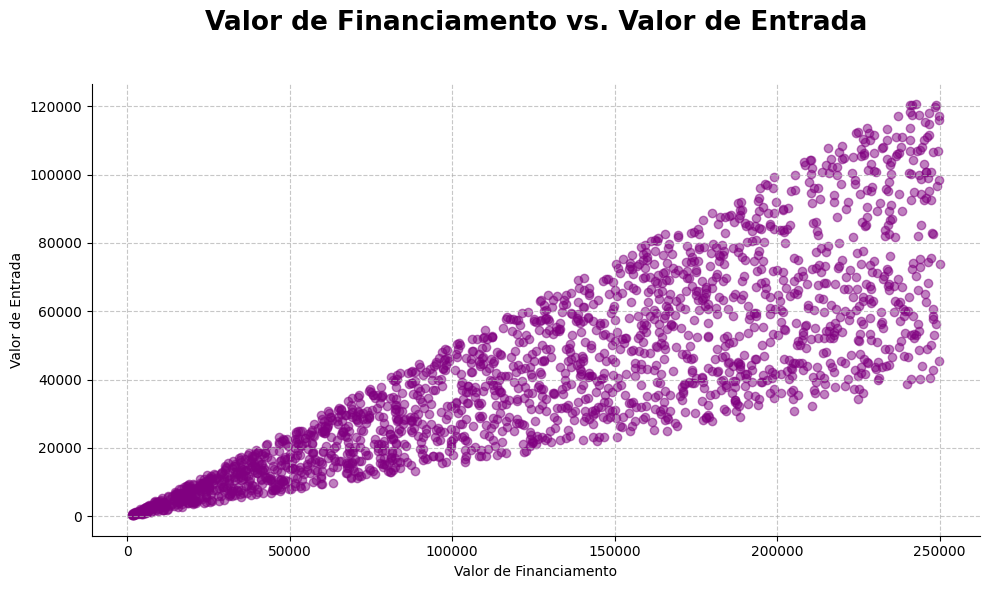

In [179]:
plt.figure(figsize=(10, 6))
plt.scatter(df_propostas_credito['valor_financiamento'], df_propostas_credito['valor_entrada'], color='purple', alpha=0.5)
plt.title('Valor de Financiamento vs. Valor de Entrada', y=1.1, fontweight='bold', fontsize=19)
plt.xlabel('Valor de Financiamento')
plt.ylabel('Valor de Entrada')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()